In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [115]:
# Cargar el conjunto de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

In [116]:
X = lfw_people.data
n_features = X.shape[1]

In [117]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(f"Dataset loaded with {n_samples} samples and {n_features} features.")

Dataset loaded with 1288 samples and 1850 features.


In [118]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance matrix shape:", cov_matrix.shape)

Covariance matrix shape: (1850, 1850)


In [119]:
def plot_gallery(images, titles, h, w, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        if i >= len(images):
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [120]:
def plot_eigenfaces(n_components_list, n_row=3, n_col=6):
    """Plot eigenfaces for different numbers of components"""
    for n_components in n_components_list:
        pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_centered)
        eigenfaces = pca.components_.reshape((n_components, h, w))
        eigenface_titles = [f"Eigenface {i + 1}" for i in range(eigenfaces.shape[0])]
        plot_gallery(eigenfaces[:n_row * n_col], eigenface_titles[:n_row * n_col], h, w, n_row, n_col)
        plt.suptitle(f"Eigenfaces with {n_components} Components")
        plt.show()

In [121]:
def plot_reconstructed_faces(n_components_list, n_row=3, n_col=6):
    """Plot original and reconstructed faces for different numbers of components"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row * len(n_components_list)))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for idx, n_components in enumerate(n_components_list):
        pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_centered)
        X_pca = pca.transform(X_centered)
        X_reconstructed = pca.inverse_transform(X_pca)
        for i in range(n_row * n_col):
            plt.subplot(len(n_components_list), n_row * n_col, idx * n_row * n_col + i + 1)
            plt.imshow(X_reconstructed[i].reshape((h, w)), cmap=plt.cm.gray)
            if i == 0:
                plt.title(f"{n_components} comps", size=12)
            plt.xticks(())
            plt.yticks(())

In [122]:
def plot_original_faces(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

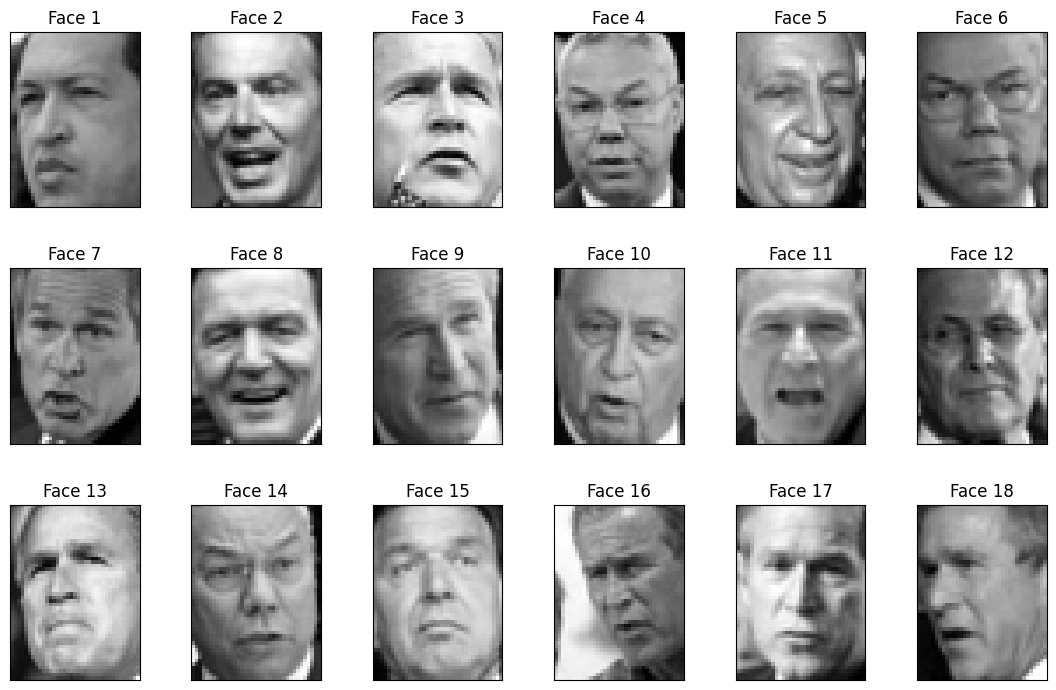

In [123]:
# Visualizar un conjunto de imágenes originales
original_face_titles = [f"Face {i + 1}" for i in range(n_samples)]
plot_original_faces(X, original_face_titles, h, w)
plt.show()

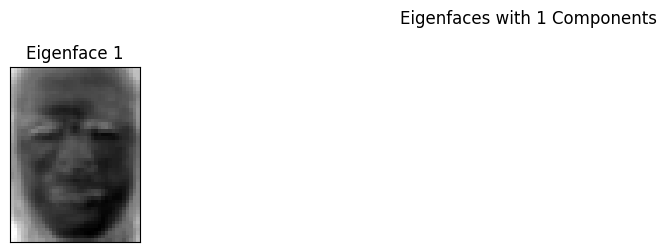

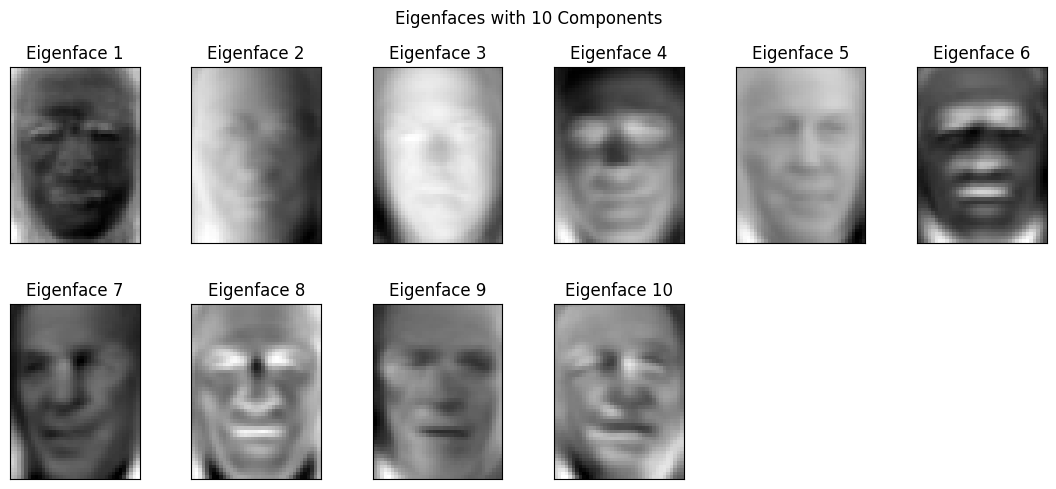

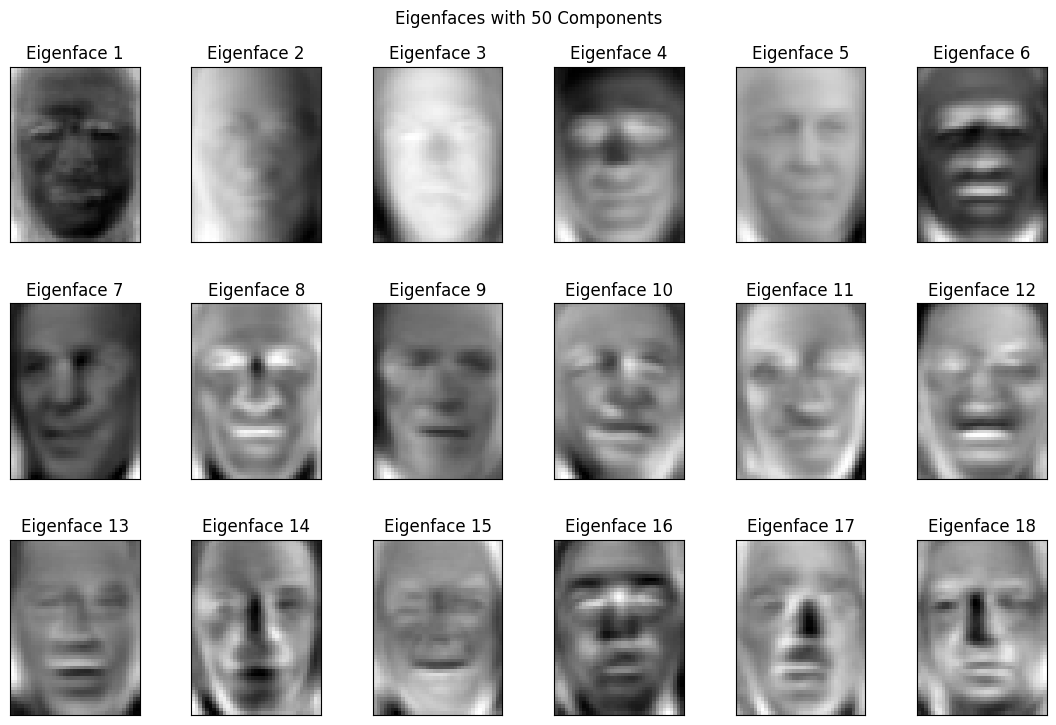

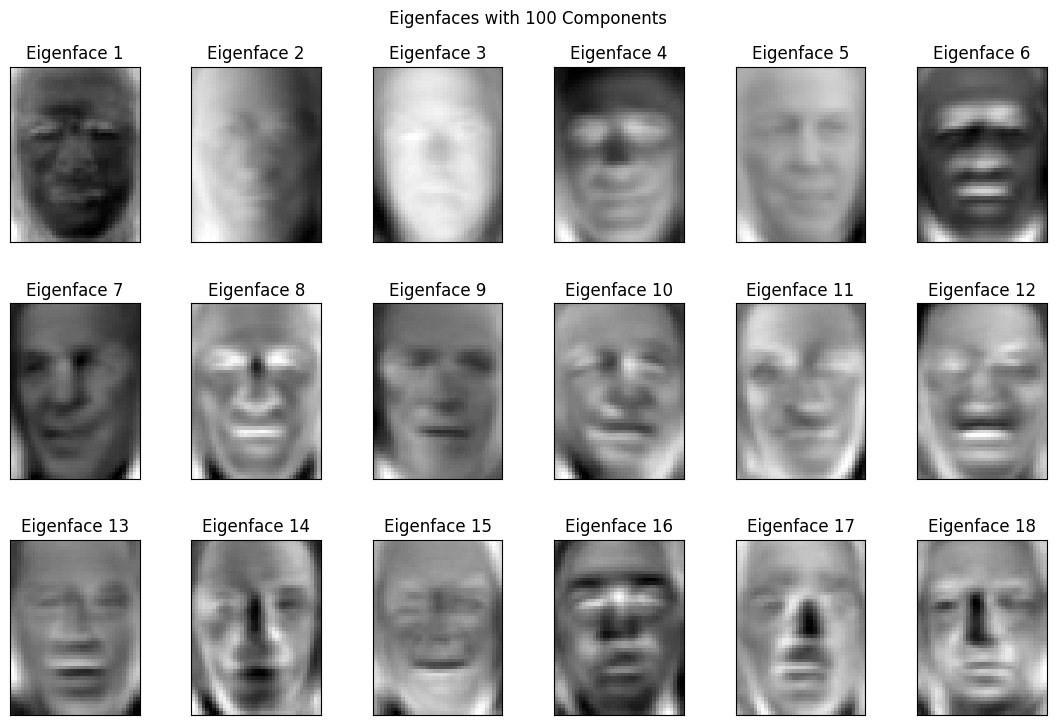

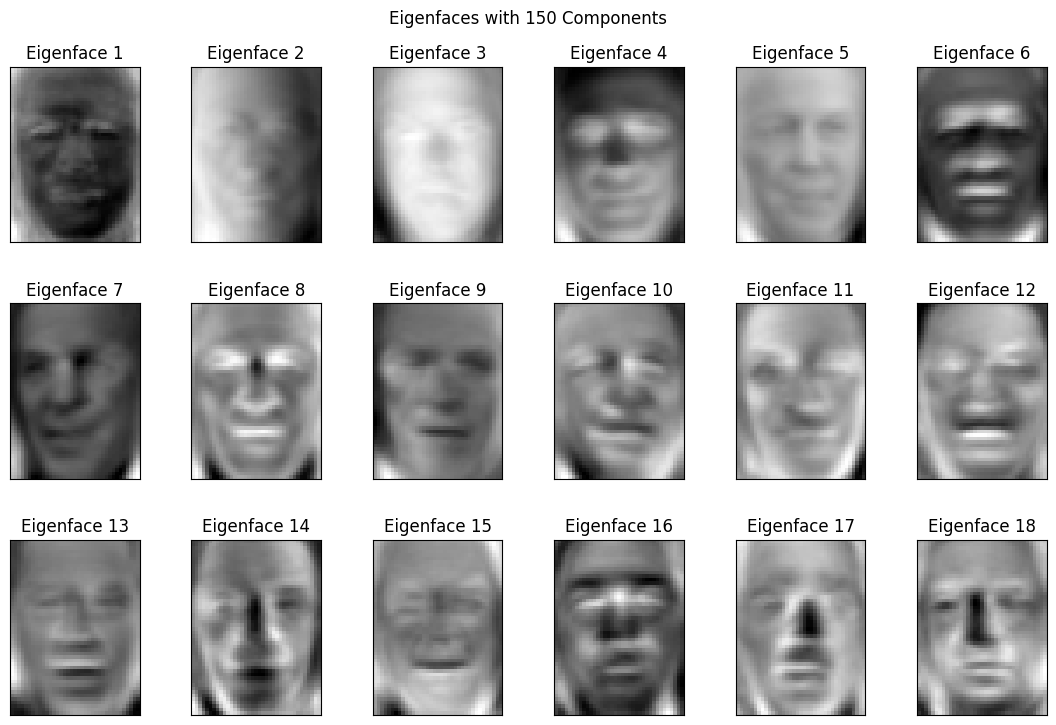

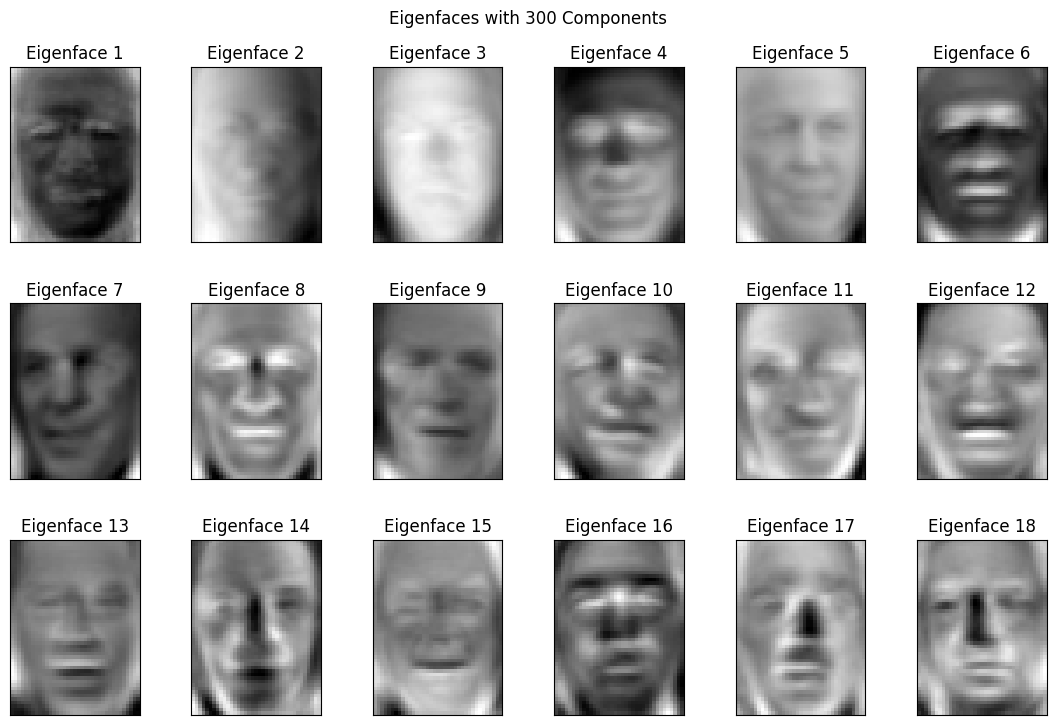

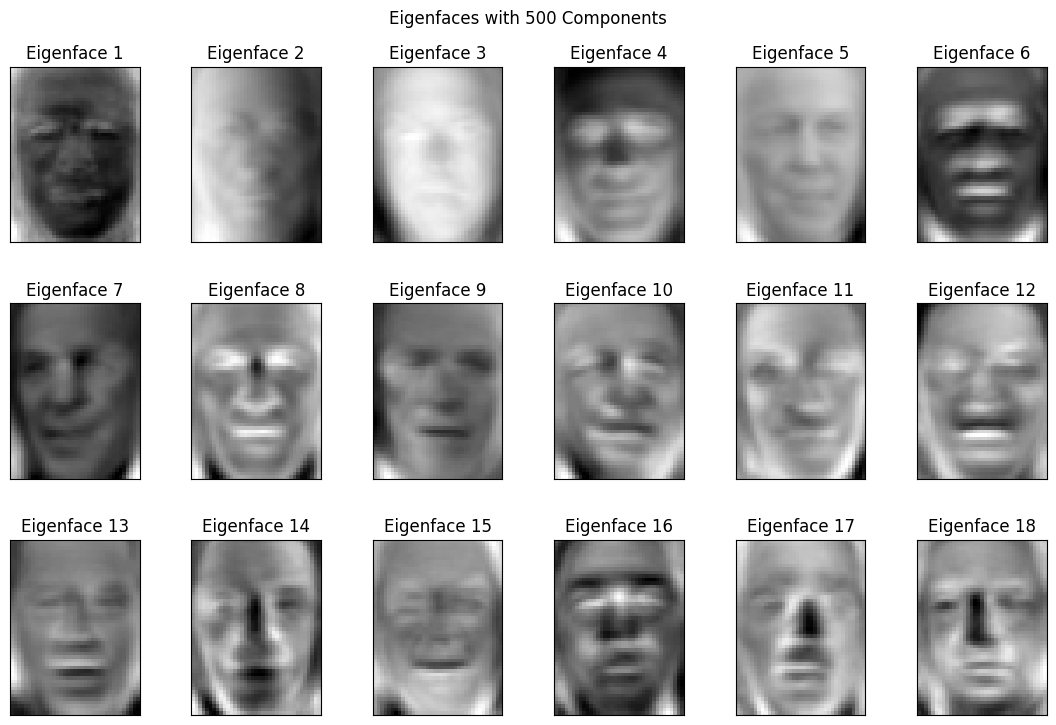

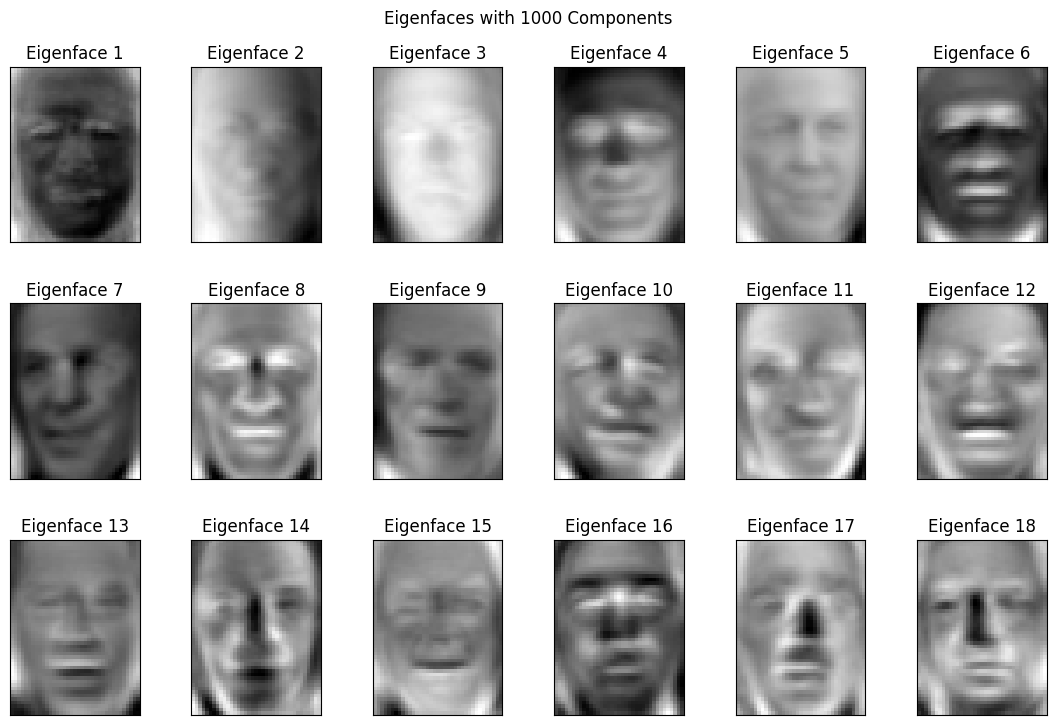

In [124]:
components_list = [1, 10, 50, 100, 150, 300, 500, 1000]
plot_eigenfaces(components_list)

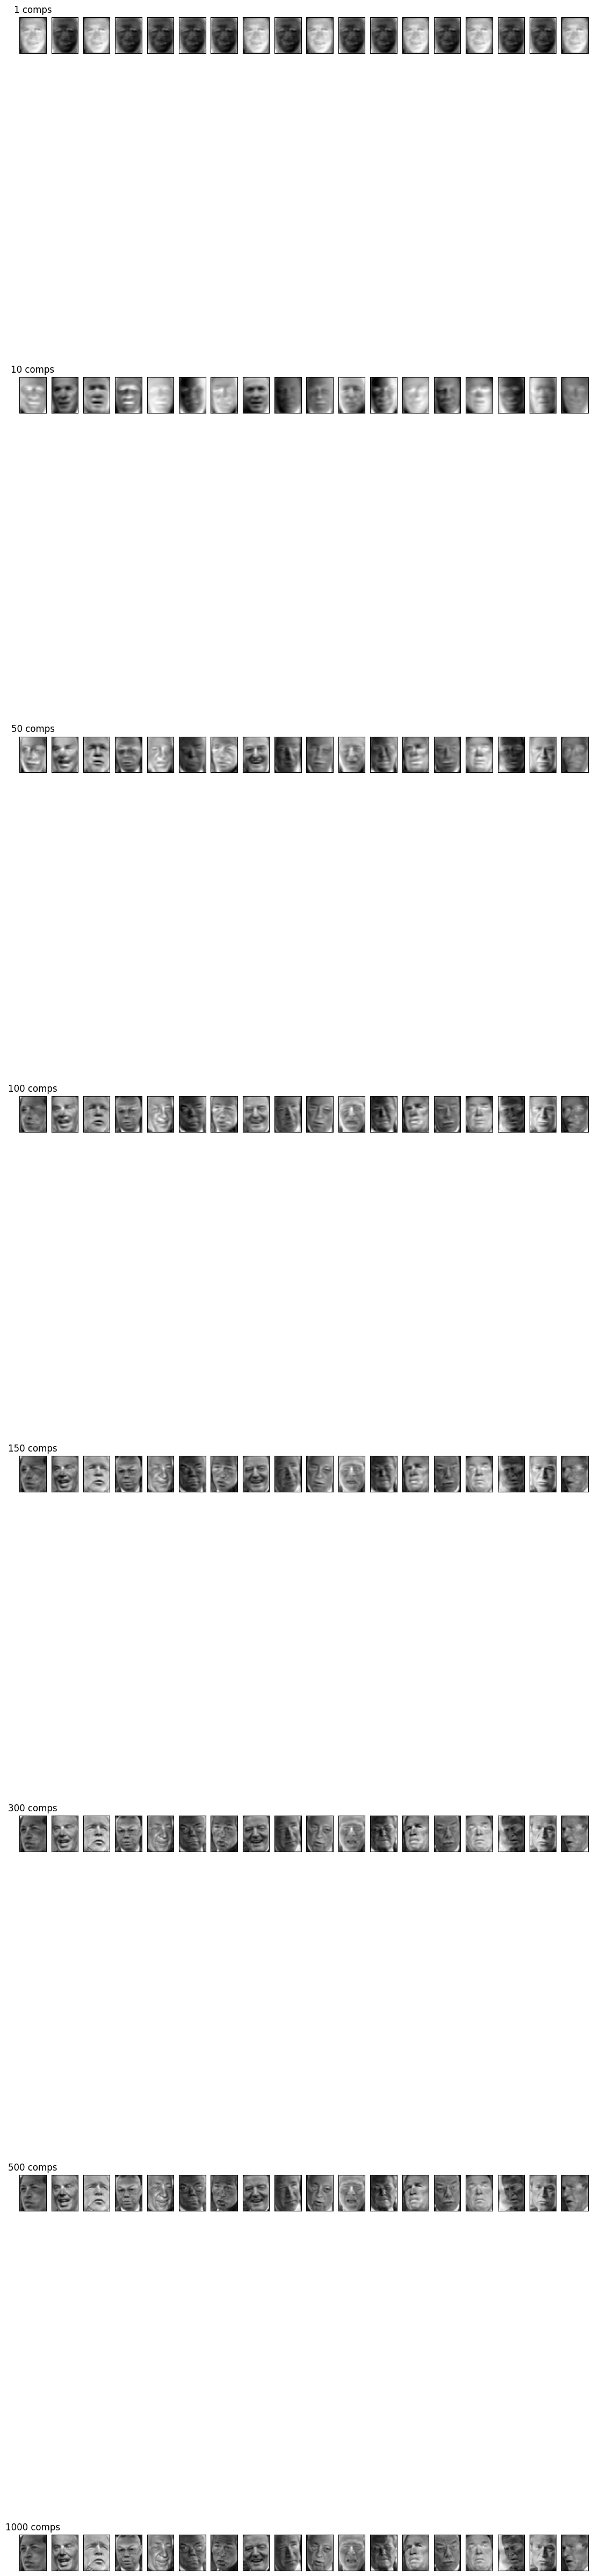

In [125]:
plot_reconstructed_faces(components_list)